# Исследуем данные

**Разделы:**
- [Импортируем бибилиотеки и загрузим данные](#импортируем-бибилиотеки-и-загрузим-данные)
- [Первичный анализ данных](#первичный-анализ-данных)
- [Анализ целевой переменной](#анализ-целевой-переменной)
- [Анализ категориальных признаков](#анализ-категориальных-признаков)
- [Анализ числовых признаков](#анализ-числовых-признаков)
- [Анализ взаимосвязей с целевой переменной](#анализ-взаимосвязей-с-целевой-переменной)

## Импортируем бибилиотеки и загрузим данные

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из data/raw/
data_path = os.path.join('..', 'data', 'raw', 'Clean_Dataset.csv')
df = pd.read_csv(data_path)

print("Размер датасета:", df.shape)
df.head()

Размер датасета: (300153, 12)


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [2]:
# Удалим сразу столбец индексов
df = df.drop(df.columns[0], axis=1)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Описание признаков нашего набора данных.

1) Авиакомпания (Airline): 
    * Описание: Название авиакомпании. 
    * Тип данных: Категориальный признак.
2) Рейс (Flight): 
    * Описание: Код рейса самолета. 
    * Тип данных: Категориальный признак.
3) Город вылета (Source City):
    * Описание: Город, из которого вылетает рейс.
    * Тип данных: Категориальный признак.
4) Время вылета (Departure Time):
    * Описание: Содержит информацию о времени вылета и имеет 6 уникальных меток времени.
    * Тип данных: Категориальный признак
5) Остановки (Stops): 
    * Описание: Указывает количество остановок между городами вылета и назначения.
    * Тип данных: Категориальный признак.
6) Время прибытия (Arrival Time): 
    * Описание: Время прибытия самолёта в пункт назначения
    * Тип данных: Категориальный признак
7) Город назначения (Destination City): 
    * Описание: Город, в который прилетает рейс.
    * Тип данных: Категориальный признак
8) Класс (Class): 
    * Описание: Класс места (бизнес/эконом)
    * Тип данных: Категориальный признак 
9) Длительность (Duration):
    * Описание: Общее время путешествия между городами в часах.
    * Тип данных: Числовой признак.
10) Дней до вылета (Days Left): 
    * Описание: Разница между датой вылета и датой бронирования.
    * Тип данных: Числовой признак.
11) Цена (Price): 
    * Описание: Стоимость билета.
    * Тип данных: Числовой признак.


Целевая переменная: `Price` - числовой признак указывающий на стоимость авиабилета

In [3]:
TARGET_COLUMN = 'price'

## Первичный анализ данных

In [4]:
import sys
sys.path.append('..')
from utils.preprocessing import print_info_unique_vals

print_info_unique_vals(df)

| airline         (count:  6)
| ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
| flight          (count:1561)
| ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
| source_city     (count:  6)
| ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
| departure_time  (count:  6)
| ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
| stops           (count:  3)
| ['zero' 'one' 'two_or_more']
| arrival_time    (count:  6)
| ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
| destination_city (count:  6)
| ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
| class           (count:  2)
| ['Economy' 'Business']


In [5]:
print("Информация о датасете:")
print(df.info())

print('\n', '-'*20, '\n')

print("\nПропущенные значения:")
print(df.isnull().sum())

print('\n', '-'*20, '\n')

print("\nСтатистика числовых признаков:")
print(df.describe())

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB
None

 -------------------- 


Пропущенные значения:
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time    

Анализ и основные моменты о датасете(выделим положительные черты и отрицательные):

**Положительные**:
* В датасете нету пропусков и это хорошо. 
* Большой объём данных (более 300 тыс. записей)

**Отрицательные, требуют обработки или внимания**
* Сильный разброс цен(врзможно выбросы)
* 8 категориальных признаков будут требовать от нас грамотного кодирования
* Перелёты <1 часа. Это странно, возможно это ошибочные данные.
* Распределение цены скошено
    * медиана: 7425
    * среднее: 20889

## Анализ целевой переменной

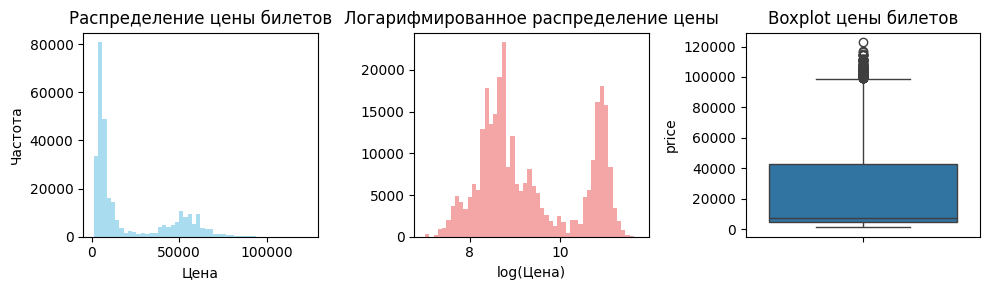

In [6]:
plt.figure(figsize=(10, 3))

# Распределение цены
plt.subplot(1, 3, 1)
plt.hist(df['price'], bins=50, alpha=0.7, color='skyblue')
plt.title('Распределение цены билетов')
plt.xlabel('Цена')
plt.ylabel('Частота')

# Логарифмированное распределение
plt.subplot(1, 3, 2)
plt.hist(np.log1p(df['price']), bins=50, alpha=0.7, color='lightcoral')
plt.title('Логарифмированное распределение цены')
plt.xlabel('log(Цена)')

# Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(y=df['price'])
plt.title('Boxplot цены билетов')

plt.tight_layout()
plt.show()

**Выводы по целевой переменной:**
* Сильно скошенное распределение
* Много выбросов в верхней части диапазона
* Логарифмирование значительно улучшает распределение

## Анализ категориальных признаков

airline
 Уникальных значений: 6
 Топ-3: {'Vistara': 127859, 'Air_India': 80892, 'Indigo': 43120}

source_city
 Уникальных значений: 6
 Топ-3: {'Delhi': 61343, 'Mumbai': 60896, 'Bangalore': 52061}

departure_time
 Уникальных значений: 6
 Топ-3: {'Morning': 71146, 'Early_Morning': 66790, 'Evening': 65102}

stops
 Уникальных значений: 3
 Топ-3: {'one': 250863, 'zero': 36004, 'two_or_more': 13286}

arrival_time
 Уникальных значений: 6
 Топ-3: {'Night': 91538, 'Evening': 78323, 'Morning': 62735}

destination_city
 Уникальных значений: 6
 Топ-3: {'Mumbai': 59097, 'Delhi': 57360, 'Bangalore': 51068}

class
 Уникальных значений: 2
 Топ-3: {'Economy': 206666, 'Business': 93487}



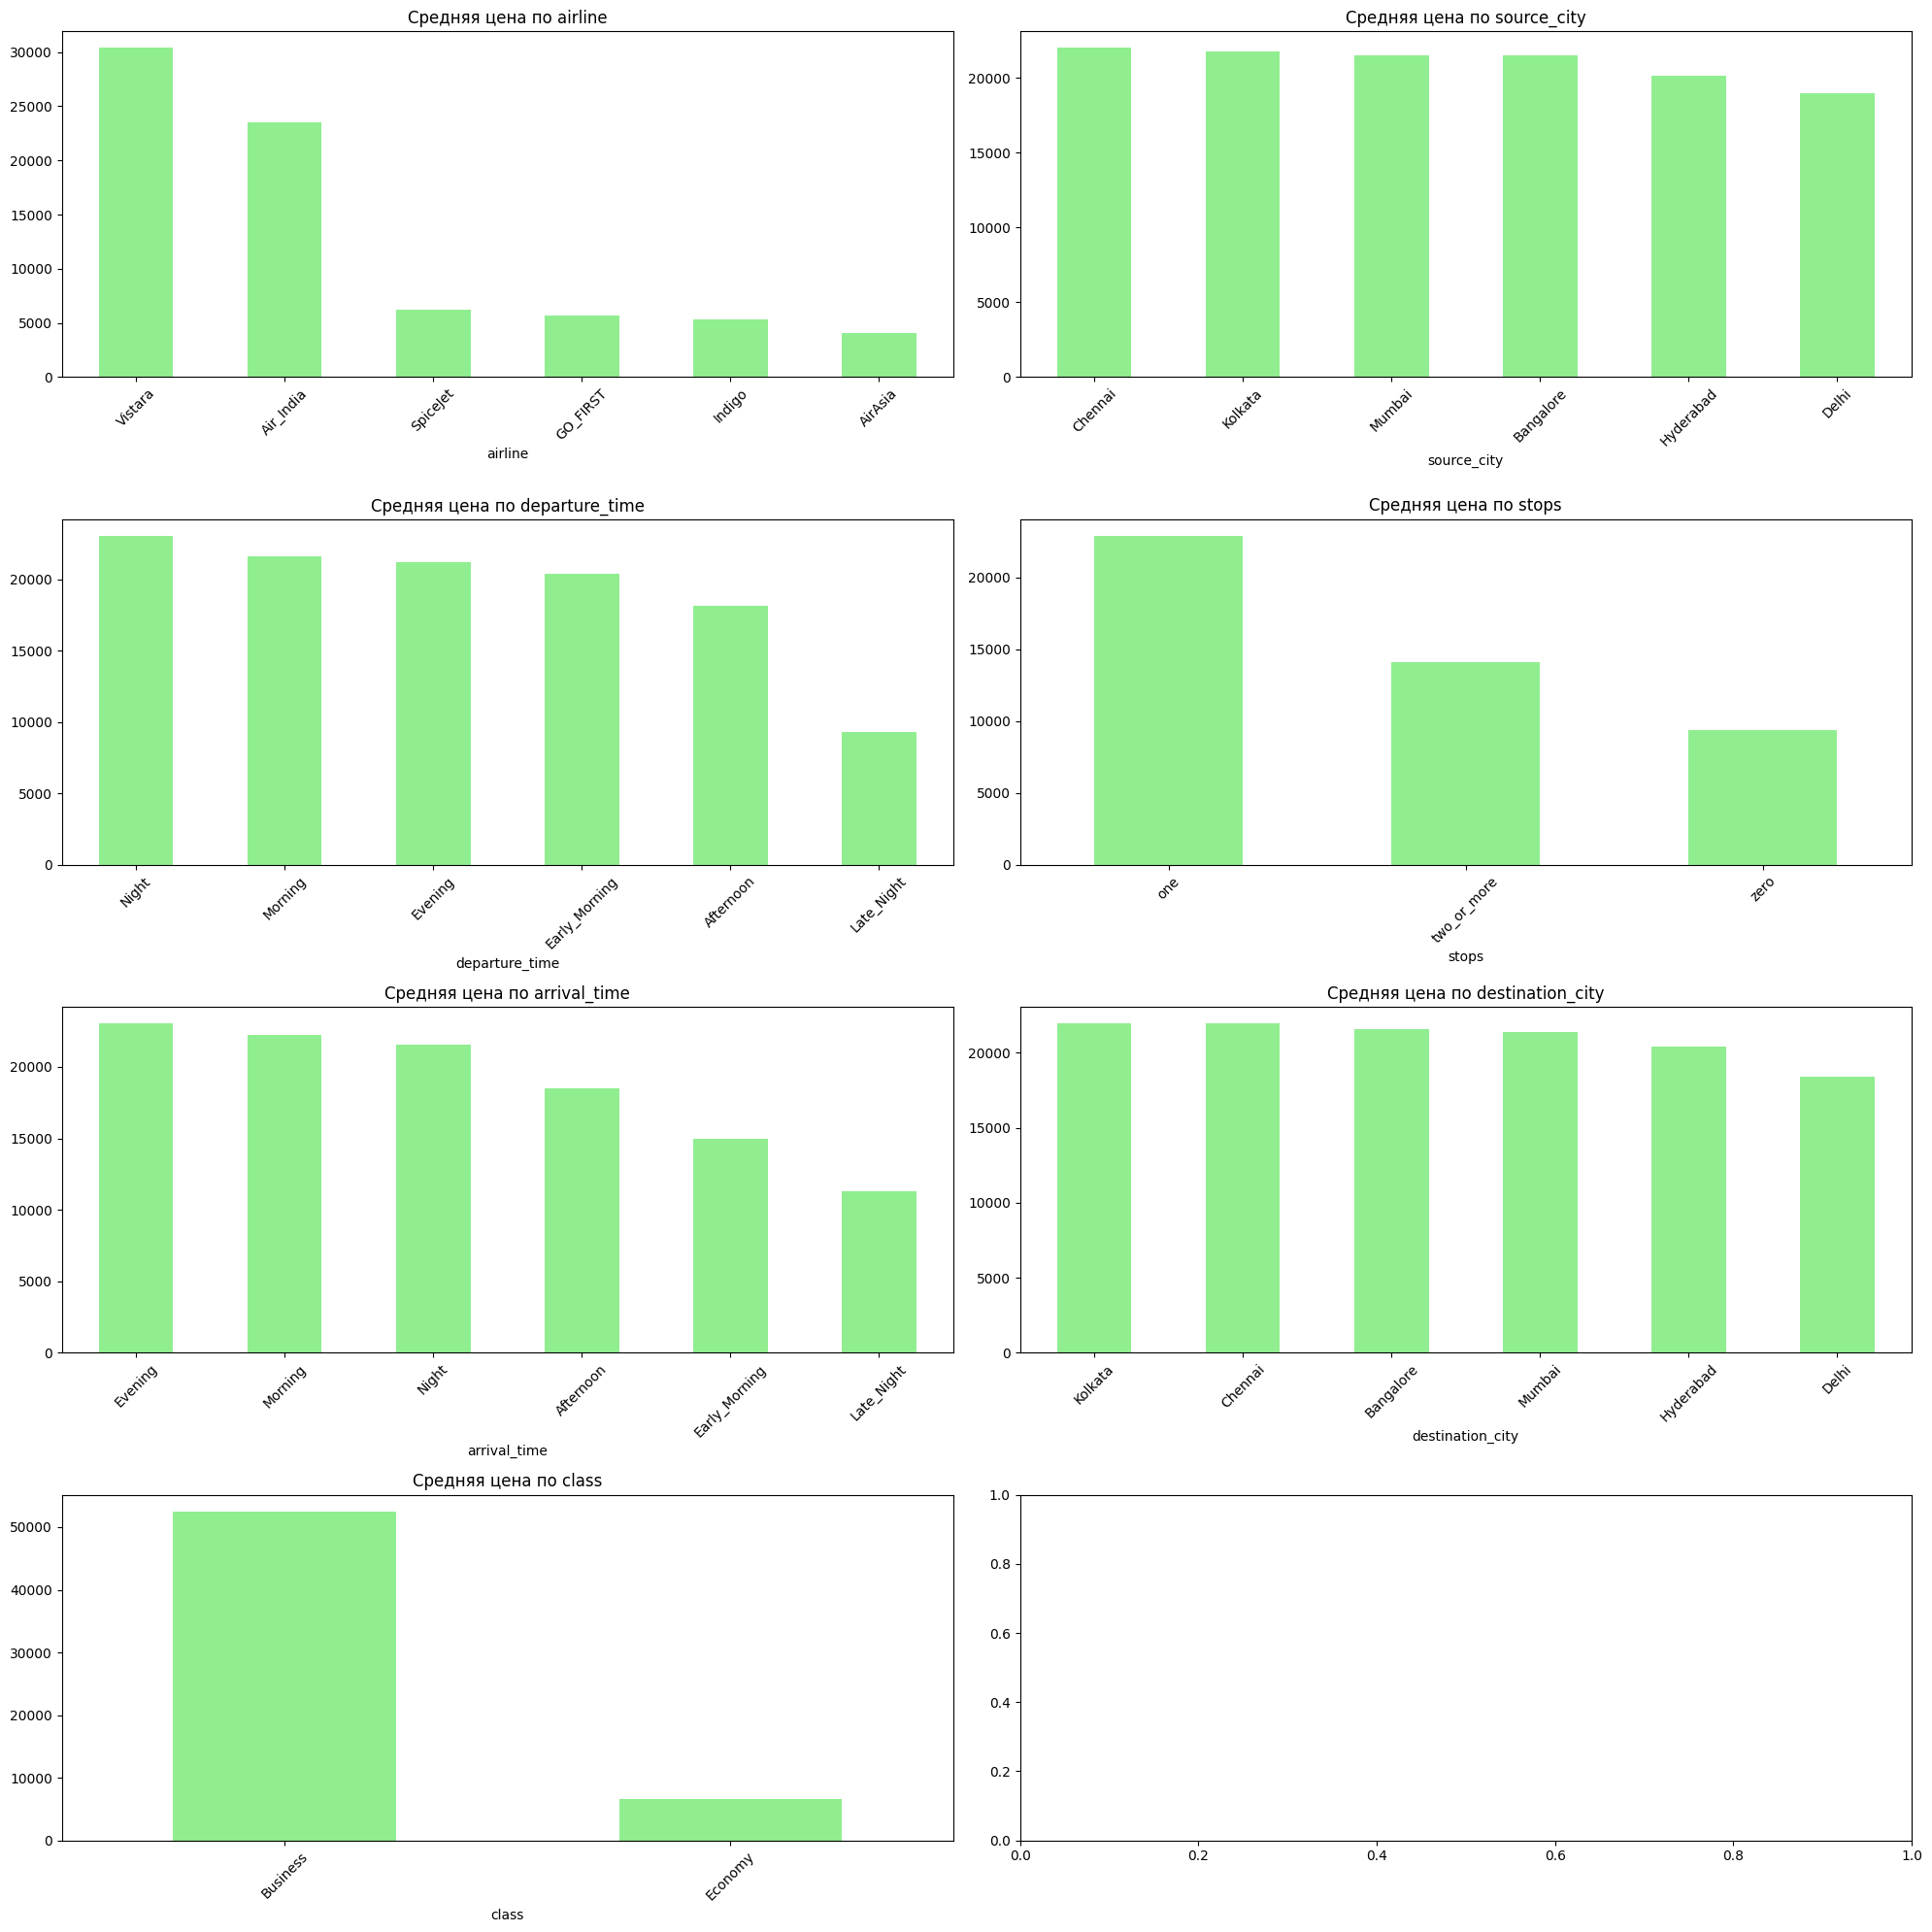

In [7]:
categorical_features = ['airline', 'source_city', 'departure_time', 'stops', 
                       'arrival_time', 'destination_city', 'class']

fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    value_counts = df[feature].value_counts()
    
    # Визуализация
    if i < len(axes):
        # Барплот с средними ценами
        price_by_category = df.groupby(feature)['price'].mean().sort_values(ascending=False)
        price_by_category.plot(kind='bar', ax=axes[i], color='lightgreen')
        axes[i].set_title(f'Средняя цена по {feature}')
        axes[i].tick_params(axis='x', rotation=45)
        
        print(f"{feature}\n Уникальных значений: {len(value_counts)}")
        print(f" Топ-3: {value_counts.head(3).to_dict()}\n")
        
plt.tight_layout()
plt.show()

**Выводы:**
* Эконом-класс доминирует (69% против 31% бизнес)
* Остановки: 83% рейсов имеют одну остановку, прямые рейсы редки (12%)
* Гипотеза: Бизнес-класс будет ключевым предиктором высокой цены
* Feature Engineering будем проводить следующим образом
    * Маршруты (source_city + destination_city)
    * Время дня как ordinal feature
    * One-Hot: airline, class, stops
    * Target Encoding: города

## Анализ числовых признаков

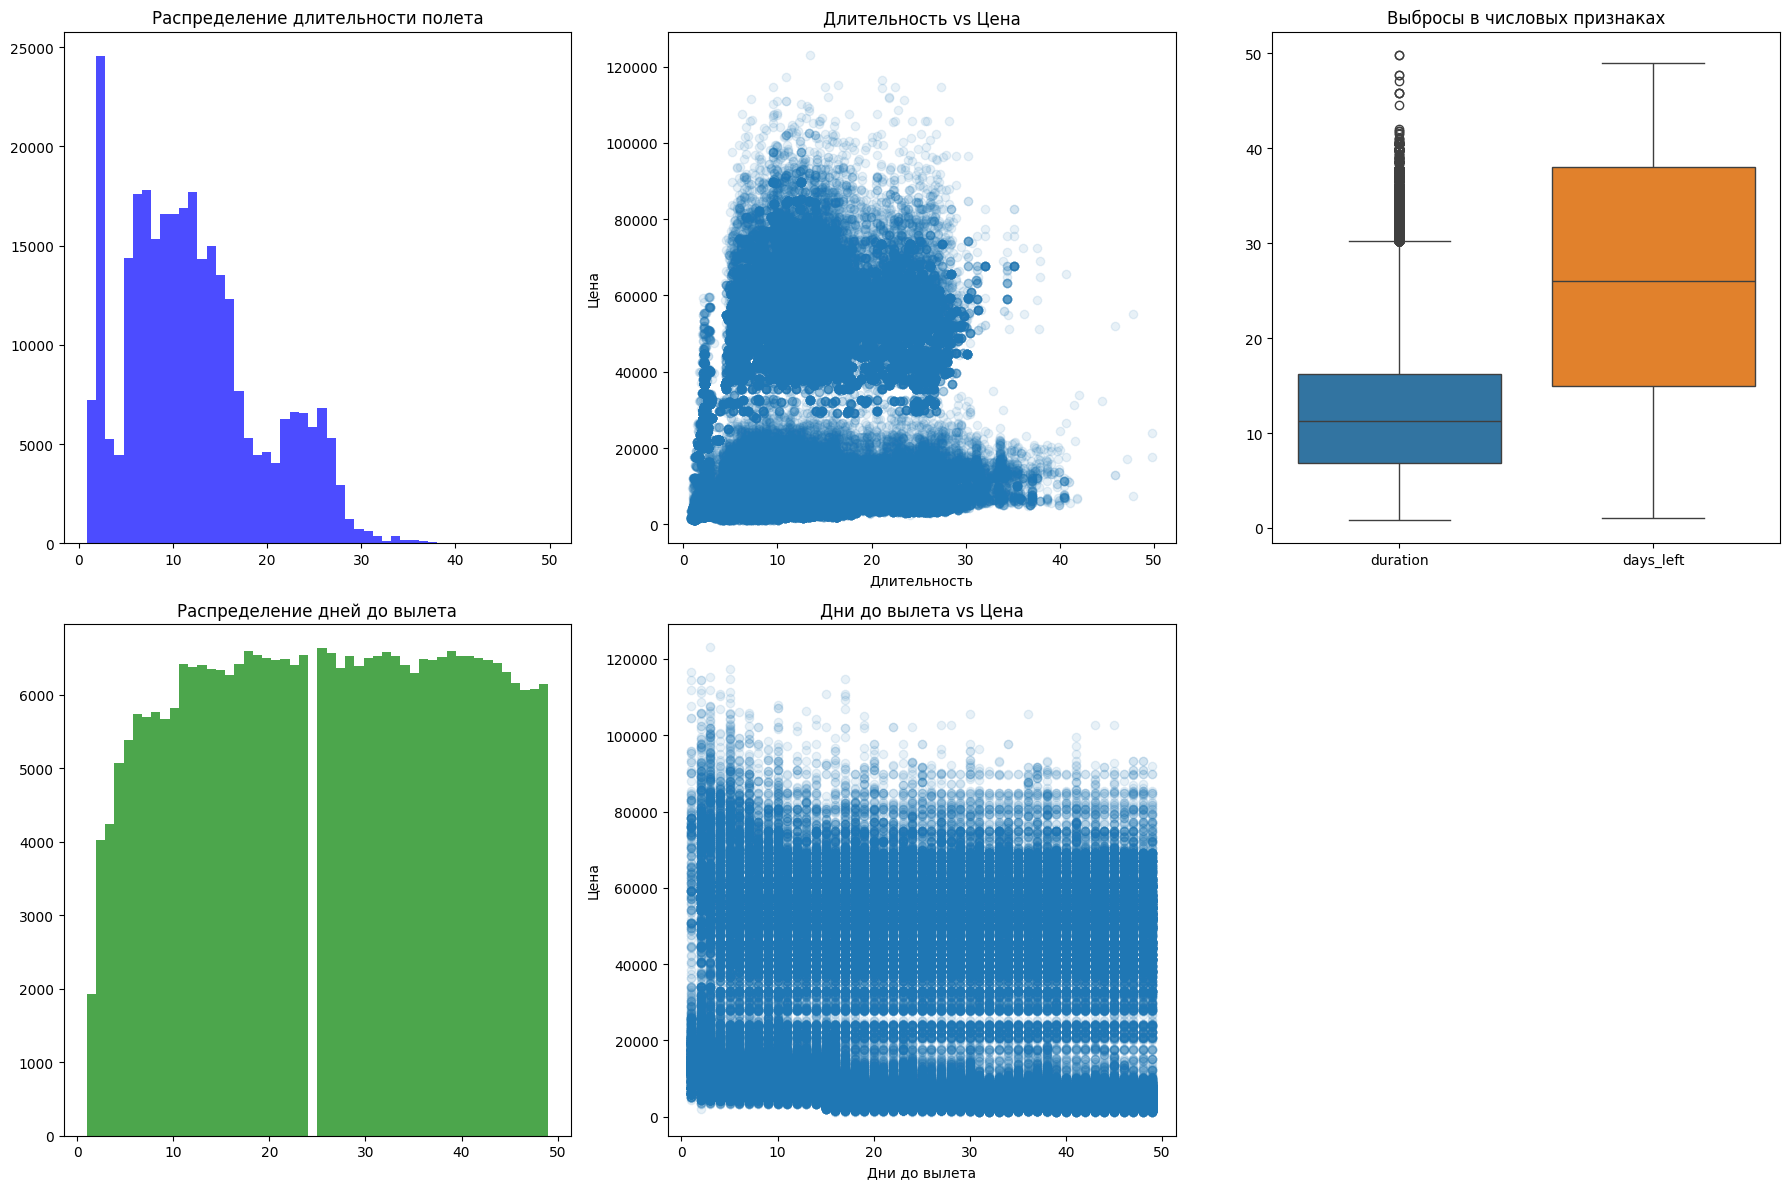

Перелеты <1 часов: 130 записей (0.04%)


In [8]:
numeric_features = ['duration', 'days_left']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Duration анализ
axes[0,0].hist(df['duration'], bins=50, alpha=0.7, color='blue')
axes[0,0].set_title('Распределение длительности полета')

axes[0,1].scatter(df['duration'], df['price'], alpha=0.1)
axes[0,1].set_title('Длительность vs Цена')
axes[0,1].set_xlabel('Длительность')
axes[0,1].set_ylabel('Цена')

# Days_left анализ
axes[1,0].hist(df['days_left'], bins=50, alpha=0.7, color='green')
axes[1,0].set_title('Распределение дней до вылета')

axes[1,1].scatter(df['days_left'], df['price'], alpha=0.1)
axes[1,1].set_title('Дни до вылета vs Цена')
axes[1,1].set_xlabel('Дни до вылета')
axes[1,1].set_ylabel('Цена')

# Boxplots для выбросов
sns.boxplot(data=df[numeric_features], ax=axes[0,2])
axes[0,2].set_title('Выбросы в числовых признаках')

axes[1,2].axis('off')

plt.tight_layout()
plt.show()

# Аномалии в duration
short_flights = df[df['duration'] < 1]
print(f"Перелеты <1 часов: {len(short_flights)} записей ({len(short_flights)/len(df)*100:.2f}%)")

**Выводы:**
* Выбросы в длительности полёта
* Нет явной линейной зависимости с целевой переменной

## Анализ взаимосвязей с целевой переменной

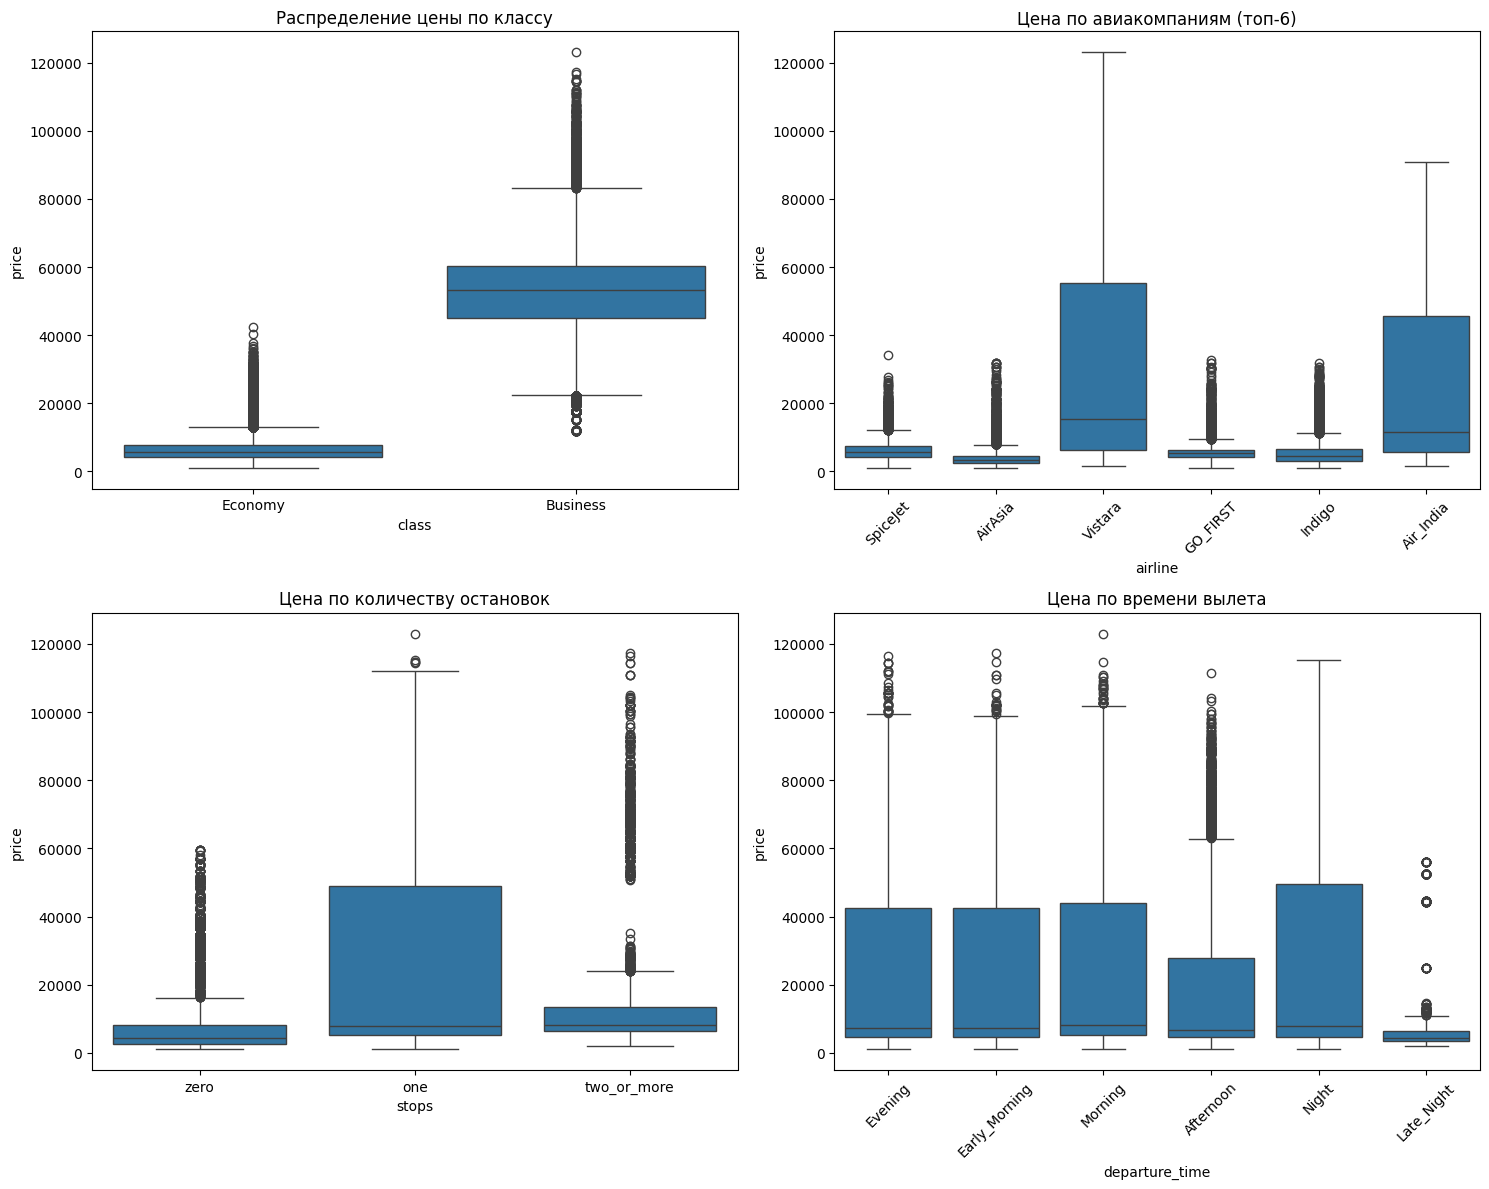

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Цена по классу
sns.boxplot(data=df, x='class', y='price', ax=axes[0,0])
axes[0,0].set_title('Распределение цены по классу')

# Цена по авиакомпании
top_airlines = df['airline'].value_counts().head(6).index
sns.boxplot(data=df[df['airline'].isin(top_airlines)], 
           x='airline', y='price', ax=axes[0,1])
axes[0,1].set_title('Цена по авиакомпаниям (топ-6)')
axes[0,1].tick_params(axis='x', rotation=45)

# Цена по количеству остановок
sns.boxplot(data=df, x='stops', y='price', ax=axes[1,0])
axes[1,0].set_title('Цена по количеству остановок')

# Цена по времени вылета
sns.boxplot(data=df, x='departure_time', y='price', ax=axes[1,1])
axes[1,1].set_title('Цена по времени вылета')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Выводы:**
* class, airline, departure_time больше всего влияют на цену авиабилета
* Прямые рейсы дешевле
* Сильное взаимодействие между авиакомпанией и классом